In [1]:
from scipy.sparse import diags #linalg
from scipy.linalg import solve
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def solver(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E = np.zeros((M+1,N+1))
    S = np.zeros((M+1,N+1))
    C = np.zeros((M+1,N+1))
    PPX = np.zeros((M+1))
    Em_E = np.zeros((M+1,N+1))
    B = np.zeros((M+1))
    RHS = np.zeros((M+1))
    E_lag = np.zeros((M+1,N+1)) 
    
    #initial conditions
    S[0,0] = 1
    C[0,0] = 1
    E[0,0] = p*h*rho2*S[0,0]+rho1*C[0,0]
    
   
    #lagrangian Step
    E_lag[0:19,0] = E[0,0]
    
    #special time step at n=0
    E[:,1] = E_lag[:,0]
    S[:,1] = E[:,1] / (p*h*rho2+rho1)
    C[:,1] = S[:,1]
    
    
    for n in range(1,N):
        E_lag[0:19,n] = E[0,0]
        E_lag[19:M+1,n] = E[1:M-17,n]+((dt/2-18*dx)/dx)*(E[0:M-18,n]-E[1:M-17,n])
        E[:,n+1] = E_lag[:,n]
        S[:,n+1] = E[:,n+1] / (p*h*rho2+rho1)
        C[:,n+1] = S[:,n+1]
        
        
    return   S, x, t


In [3]:
def solver1(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E1 = np.zeros((M+1,N+1))
    S1 = np.zeros((M+1,N+1))
    C1 = np.zeros((M+1,N+1))
    Em = np.zeros((M+1,N+1))
    Ei = np.zeros((M+1,N+1))
    Em_lag = np.zeros((M+1,N+1))
    
    #initial conditions
    S1[0,0] = 1
    C1[0,0] = 0
    Em[0,0] = p*h*rho2*S1[0,0]
    Ei[0,0] = rho1*C1[0,0]
   
    #lagrangian Step
    Em_lag[0:37,0] = Em[0,0]
    
    #special time step at n=0  
    E1[:,1] = Em_lag[:,0] + Ei[:,0]
    S1[:,1] = E1[:,1] / (p*h*rho2+rho1)
    C1[:,1] = S1[:,1]
    Ei[:,1] = rho1*C1[:,1]
    Em[:,1] = p*h*rho2*S1[:,1]
    S1[0,1] = 1
    
    for n in range(1,N):
        Em_lag[0:37,n] = Em[0,0]
        Em_lag[37:M+1,n] = Em[1:M-35,n]+((dt-36*dx)/dx)*(Em[0:M-36,n]-Em[1:M-35,n])
        E1[:,n+1] = Em_lag[:,n] + Ei[:,n]
        S1[:,n+1] = E1[:,n+1] / (p*h*rho2+rho1)
        C1[:,n+1] = S1[:,n+1]
        Ei[:,n+1] = rho1*C1[:,n+1]
        Em[:,n+1] = p*h*rho2*S1[:,n+1]
        S1[0,n+1] = 1
        
    return   S1, x, t


In [4]:
def solver2(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E2 = np.zeros((M+1,N+1))
    S2 = np.zeros((M+1,N+1))
    C2 = np.zeros((M+1,N+1))
    Em = np.zeros((M+1,N+1))
    Ei = np.zeros((M+1,N+1))
    Em_lag = np.zeros((M+1,N+1))
    
    #initial conditions
    S2[0,0] = 1
    C2[0,0] = 0
    Em[0,0] = p*h*rho2*S2[0,0]
    Ei[0,0] = rho1*C2[0,0]
   
    #lagrangian Step
    Em_lag[0:37,0] = Em[0,0]
    
    #special time step at n=0  
    E2[:,1] = Em_lag[:,0] + Ei[:,0]
    S2[:,1] = E2[:,1] / (p*h*rho2+rho1)
    C2[:,1] = S2[:,1]
    Ei[:,1] = rho1*C2[:,1]
    Em[:,1] = p*h*rho2*S2[:,1]
    S2[0,1] = 1
    
    for n in range(1,N):
        Em_lag[0:37,n] = Em[0,0]
        Em_lag[37:M+1,n] = Em[1:M-35,n]+((dt-36*dx)/dx)*(Em[0:M-36,n]-Em[1:M-35,n])
        E2[:,n+1] = Em_lag[:,n] + Ei[:,n]
        S2[:,n+1] = E2[:,n+1] / (p*h*rho2+rho1)
        C2[:,n+1] = S2[:,n+1]
        Ei[:,n+1] = rho1*C2[:,n+1]
        Em[:,n+1] = p*h*rho2*S2[:,n+1]
        S2[0,n+1] = 1
        
    return   S2, x, t


In [9]:
from scipy.integrate import quad
#Solving for matrices L1, L2, L3
T = 1800
L = 4000
wd = 10         #width
h = 2           #height
fv = 1          #flow velocity
sg = 1          #specific gravity
den = 1000      #density of CIMW and CMW
p = 2*h+wd      #wetted perimeter
theta = 1       #porosity
l = 10          #element distance
Q = 20          #flow rate
K = 0           #dispersion coefficient K=diffusion+dispersitivity*fv
A = wd*h        #Area
r = 1.5
r2 = 0.005
dt = 360        #time step size
dx = 10
w1 = 1          #weight
w2 = 0
N = int(round(T/dt))          #no. of time steps
M = int(round(L/dx))          #no. of nodes
rho1 = p*h*den*theta
rho2 = den

(S1,x,t) = solver1(T,dt)
(S,x,t) = solver(T,dt)
(S2,x,t) = solver2(T,dt)

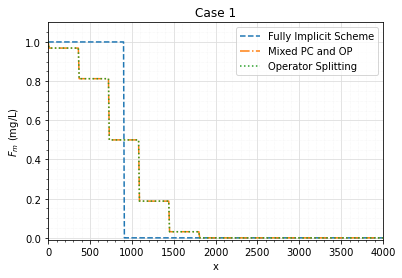

In [12]:
fig, ax = plt.subplots()
ax.axis([-0.1,L+0.1,-0.01,1.1]) 
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()

plt.plot(x,S[:,N], "--")
plt.plot(x,S1[:,N], "-.")
plt.plot(x,S2[:,N], ":")
plt.legend(["Fully Implicit Scheme", "Mixed PC and OP", "Operator Splitting"], loc ="upper right")
plt.xlabel("x")
plt.ylabel("$F_m$ (mg/L)")
plt.title("Case 1")
plt.savefig('Example 2 Case 1.png')

plt.show()